In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c
# lr.predict([[12,20,32]])
# calculate r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Ai Quest/class-14- gradient descent and linear regression/linear_regression_for_multiple_variable/supershop.csv')

In [5]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [6]:
df.shape

(50, 5)

#PreProcessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        49 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape


(49, 5)

#encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df.Area = le.fit_transform(df.Area)

In [16]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [17]:
df.corr()

,Marketing Spend,Administration,Transport,Area,Profit
Marketing Spend,1.000000,0.227141,0.718574,0.144197,0.937853
Administration,0.227141,1.000000,0.009534,0.014675,0.197201
Transport,0.718574,0.009534,1.000000,0.224591,0.782578
Area,0.144197,0.014675,0.224591,1.000000,0.151808
Profit,0.937853,0.197201,0.782578,0.151808,1.000000


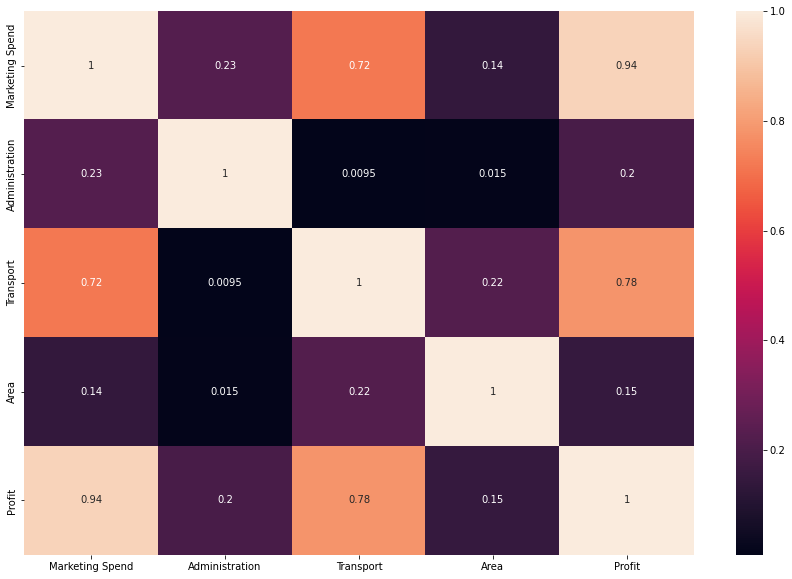

In [18]:
plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr() , annot=True)

## sep x,y

In [19]:
x = df.drop('Profit',axis=1) #separate dependent and independent variable
y = df['Profit']

In [20]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,2
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,2


In [21]:
x.shape

(49, 4)

In [22]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [23]:
y.shape

(49,)

#hold out cross validation

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
xtrain,xtest, ytrain,ytest = train_test_split(x, y, train_size=.75,random_state=42) 

#Multiple variable Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [37]:
lr.fit(xtrain,ytrain)

LinearRegression()

# find out the coef , intercept

In [38]:
lr.intercept_

38515.54444753102

In [39]:
lr.coef_

array([ 5.86127477e-01,  3.91267277e-02,  1.22136628e-01, -5.87591086e+02])

In [40]:
#now ami ekta y calculate kore dekhbo manually
# ei x gulor jonno
# 114523.61	, 136897.80,	471784.10,	1
x1 = 114523.61	
x2=136897.80	
x3=471784.10	
x4=1
m1=5.86127477e-01  
m2=3.91267277e-02  
m3=1.22136628e-01 
m4=-5.87591086e+02
c = 38515.54444753102
y_cal = m1*x1 + m2*x2 + m3*x3 + c

In [42]:
y_cal #predicted
#actual was--->   192261.83

168619.46109510685

In [ ]:
#again prediction using .predict
lr.predict([[12,20,32]])

In [45]:

lr.predict([[114523.61,136897.80,471784.10,1]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([168031.87022518])

In [44]:
#168031.87022518

In [49]:
y_pred=lr.predict(xtest)

In [50]:
y_pred

array([128595.93329227,  78931.45724427,  40270.2039009 ,  43604.45742863,
       133598.2002145 ,  97631.51894601, 128331.80023099, 103504.67563228,
        86365.85713342, 124143.15326849, 127852.66194309, 168931.81610109,
        93326.89447522])

In [52]:
# calculate r2_score
from sklearn.metrics import r2_score
Score = r2_score(ytest,y_pred)

In [53]:
Score


0.8521897887077595

In [54]:
#accuracy
lr.score(xtest,ytest)

0.8521897887077595

In [55]:
#we got same